# Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
import os

In [14]:
#os.listdir("/kaggle/input/animals10/raw-img/elefante")

['cavallo',
 'pecora',
 'elefante',
 'gatto',
 'scoiattolo',
 'gallina',
 'ragno',
 'mucca',
 'cane',
 'farfalla']

In [4]:
file_path = "/kaggle/input/animals10/raw-img"

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_data = train_datagen.flow_from_directory(file_path,
                                              target_size = (224,224), 
                                              batch_size = 32,
                                              class_mode = 'categorical') 


test_data = test_datagen.flow_from_directory(file_path,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = 'categorical') 

Found 26179 images belonging to 10 classes.
Found 26179 images belonging to 10 classes.


# CNN Model

In [7]:
model = Sequential([
    
    Input(shape = (224, 224, 3)),
    Conv2D(16, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(256, activation = "relu"),
    Dropout(0.2),
    Dense(512, activation = "relu"),
    Dropout(0.2),

    # output Layer

    Dense(train_data.num_classes, activation = "softmax")
    
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,953,002 (18.89 MB)

 Trainable params: 4,953,002 (18.89 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer= "adam", loss= "categorical_crossentropy",metrics= ["accuracy"])

In [9]:
model.fit(train_data,
          epochs = 10, 
          validation_data = test_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


819/819 ━━━━━━━━━━━━━━━━━━━━ 209s 244ms/step - accuracy: 0.3002 - loss: 1.9855 - val_accuracy: 0.5349 - val_loss: 1.3377
Epoch 2/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 108s 131ms/step - accuracy: 0.5370 - loss: 1.3452 - val_accuracy: 0.6531 - val_loss: 1.0292
Epoch 3/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 112s 136ms/step - accuracy: 0.6504 - loss: 1.0374 - val_accuracy: 0.7707 - val_loss: 0.6932
Epoch 4/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 108s 132ms/step - accuracy: 0.7334 - loss: 0.7892 - val_accuracy: 0.8420 - val_loss: 0.4993
Epoch 5/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 109s 133ms/step - accuracy: 0.7996 - loss: 0.5851 - val_accuracy: 0.8963 - val_loss: 0.3398
Epoch 6/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 111s 135ms/step - accuracy: 0.8509 - loss: 0.4385 - val_accuracy: 0.9231 - val_loss: 0.2347
Epoch 7/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 109s 133ms/step - accuracy: 0.8913 - loss: 0.3282 - val_accuracy: 0.9363 - val_loss: 0.2006
Epoch 8/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 113s 138ms/step - accuracy: 0.9084 - loss: 0.27

In [10]:
img = cv2.imread("/kaggle/input/animals10/raw-img/elefante/OIP-eH_1Fbn8w58FGBxN1ZwuAgHaFU.jpeg")


In [11]:
img = cv2.imread('/kaggle/input/animals10/raw-img/cavallo/OIP---sK_NCo5VFiDavIY-pUdgHaFB.jpeg')
#results = model.predict(img)

#plt.figure(figsize=(12, 8))
#plt.imshow(results[0].plot()[:, :, ::-1])
#plt.axis('off')
#plt.show()

img.shape

(204, 300, 3)

In [36]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = "/kaggle/input/animals10/raw-img/elefante/OIP-eH_1Fbn8w58FGBxN1ZwuAgHaFU.jpeg"
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Scale the image (same as during training)
img_array = img_array / 255.0

# Add an extra dimension to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: [2]


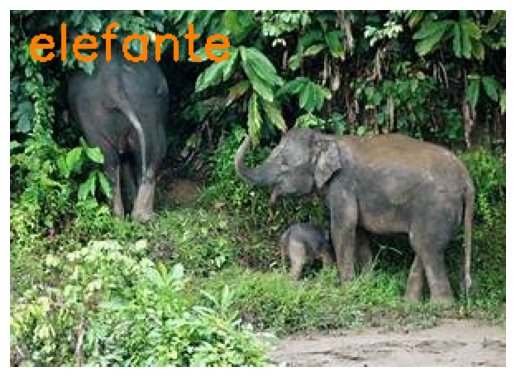

Predicted class: elefante


In [38]:
# Map the predicted class number to the class name
class_names = list(train_data.class_indices.keys())  # Get class names from the training data
predicted_class_name = class_names[predicted_class[0]]

# Load the image using OpenCV for annotation
img_cv2 = cv2.imread(img_path)
img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Add the predicted class name to the image
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 127, 0)  # Red color
thickness = 2
cv2.putText(img_cv2, predicted_class_name, (10, 30) , font, font_scale, font_color, thickness )

# Display the image with the predicted class name
plt.imshow(img_cv2)
plt.axis('off')  # Hide axes
plt.show()

print(f'Predicted class: {predicted_class_name}')
